# With KNN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv(r'C:\Users\sagar\Downloads\Inventateq DATA SCIENCE\Datasets\titanic_train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
dataset.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


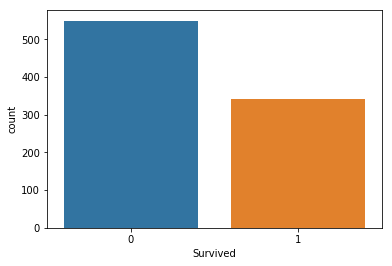

In [6]:
sb.countplot(x='Survived',data=dataset)

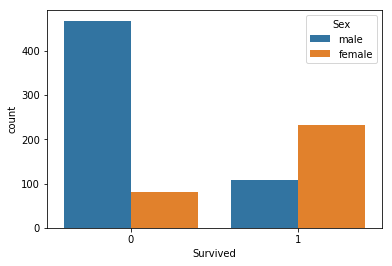

In [7]:
sb.countplot(x='Survived',hue='Sex',data=dataset)

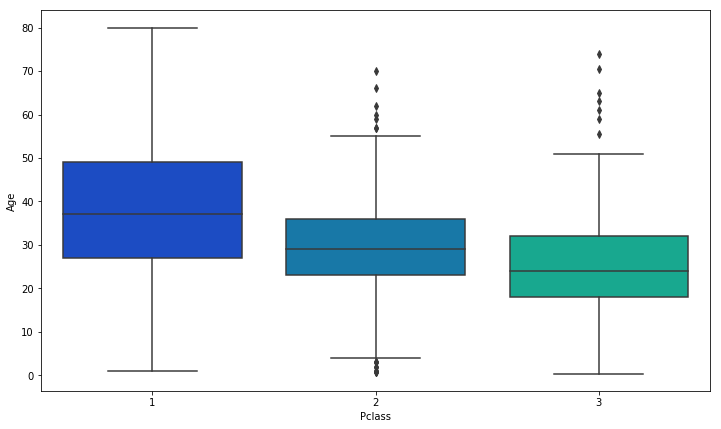

In [8]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [9]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [10]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_age,axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
dataset.drop('Cabin',axis=1,inplace=True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [14]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)

In [15]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [16]:
dataset=pd.concat([dataset,sex,embark],axis=1)

In [17]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [20]:
print(dataset.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


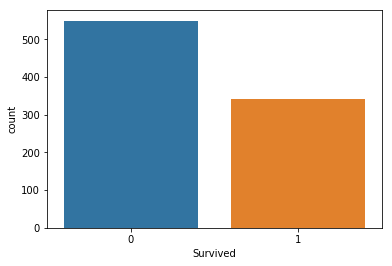

In [21]:
sb.countplot(dataset['Survived'],label="Count")

In [50]:
# Now we do train test split
# another method of train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.loc[:,dataset.columns!='Survived'],
                                              dataset['Survived'],random_state=101,stratify=dataset['Survived'])

In [51]:
pd.concat((x_test,y_test),axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
374,3,3.00,3,1,21.0750,0,0,1,0
413,2,29.00,0,0,0.0000,1,0,1,0
83,1,28.00,0,0,47.1000,1,0,1,0
85,3,33.00,3,0,15.8500,0,0,1,1
345,2,24.00,0,0,13.0000,0,0,1,1
310,1,24.00,0,0,83.1583,0,0,0,1
811,3,39.00,0,0,24.1500,1,0,1,0
402,3,21.00,1,0,9.8250,0,0,1,0
351,1,37.00,0,0,35.0000,1,0,1,0
812,2,35.00,0,0,10.5000,1,0,1,0


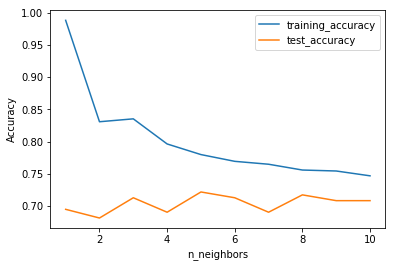

In [52]:
# Finding K value

from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
# try n neighbor from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #Record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #Record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training_accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test_accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_compare_model')

In [53]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [54]:
knn.score(x_test,y_test)

0.7085201793721974

Pclass
1    216
2    184
3    491
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
     Survived    Age  SibSp  Parch      Fare  male  Q  S  Pclass
874         1  28.00      1      0   24.0000     0  0  0       2
835         1  39.00      1      1   83.1583     0  0  0       1
157         0  30.00      0      0    8.0500     1  0  1       3
437         1  24.00      2      3   18.7500     0  0  1       2
802         1  11.00      1      2  120.0000     1  0  1       1
723         0  50.00      0      0   13.0000     1  0  1       2
285         0  33.00      0      0    8.6625     1  0  0       3
752         0  33.00      0      0    9.5000     1  0  1       3
259         1  50.00      0      1   26.0000     0  0  1       2
65          1  24.00      1      1   15.2458     1  0  0       3
765         1  51.00      1      0   77.9583     0  0  1       1
388         0  24.00      0      0    7.7292     1  1  0       3
722         0  34.00      0      0   13.0000     1  0  1       2
781   

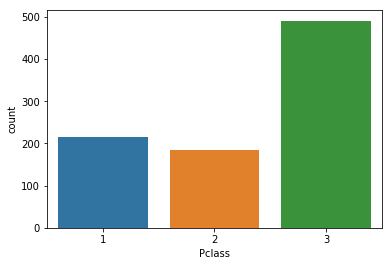

In [65]:
print(dataset.groupby('Pclass').size())
print(sb.countplot(dataset['Pclass'],label="Count"))
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.loc[:,dataset.columns!='Pclass'],
                                              dataset['Pclass'],random_state=66,stratify=dataset['Pclass'])

print(pd.concat((x_test,y_test),axis=1))

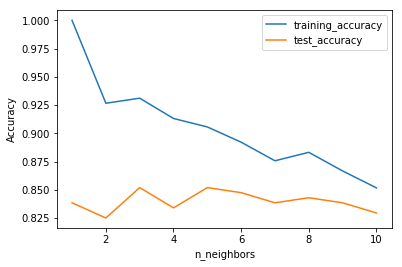

In [66]:
# Finding K value

from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
# try n neighbor from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #Record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #Record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training_accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test_accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_compare_model')

In [68]:
knn=KNeighborsClassifier(n_neighbors=9)
print(knn.fit(x_train,y_train))
knn.score(x_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


0.8385650224215246

Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Length: 88, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

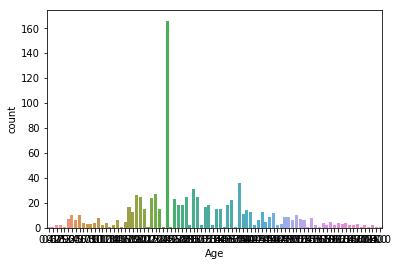

In [69]:
print(dataset.groupby('Age').size())
print(sb.countplot(dataset['Age'],label="Count"))
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.loc[:,dataset.columns!='Age'],
                                              dataset['Age'],random_state=66,stratify=dataset['Age'])

print(pd.concat((x_test,y_test),axis=1))

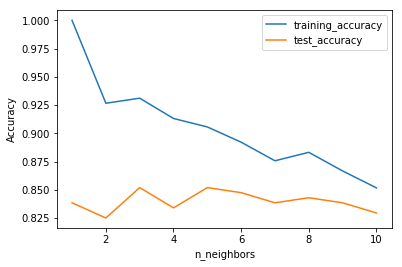

In [70]:
# Finding K value

from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
# try n neighbor from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #Record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #Record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training_accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test_accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('knn_compare_model')

In [71]:
knn=KNeighborsClassifier(n_neighbors=9)
print(knn.fit(x_train,y_train))
knn.score(x_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


0.8385650224215246